<h2 style="text-align:center;font-family:verdana;"><b>Mental Health in Tech - Analysis</b></h2>
<hr>
<p style="font-family:verdana;font-size:20px"> As a fresher nearing 1 year of full-time experience, I was genuinely curious to understand the mental health status of more experienced professionals and how much backing they receive from their organizations to open up and express themselves. Additionally, I wanted to explore on the cause of stress and whether the company is in any way responsible. I hope to uncover something cool. Let's go!!
</p>

In [40]:
import numpy as np 
import pandas as pd
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [2]:
init_notebook_mode(connected=True)
cf.go_offline(True)

In [3]:
survey_df = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")

In [4]:
survey_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
survey_df.shape

(1259, 27)

<h2> Checking for missing values </h2>

In [20]:
features = survey_df.isnull().sum().sort_values(ascending=False).index
missing_data = survey_df.isnull().sum().sort_values(ascending=False).values

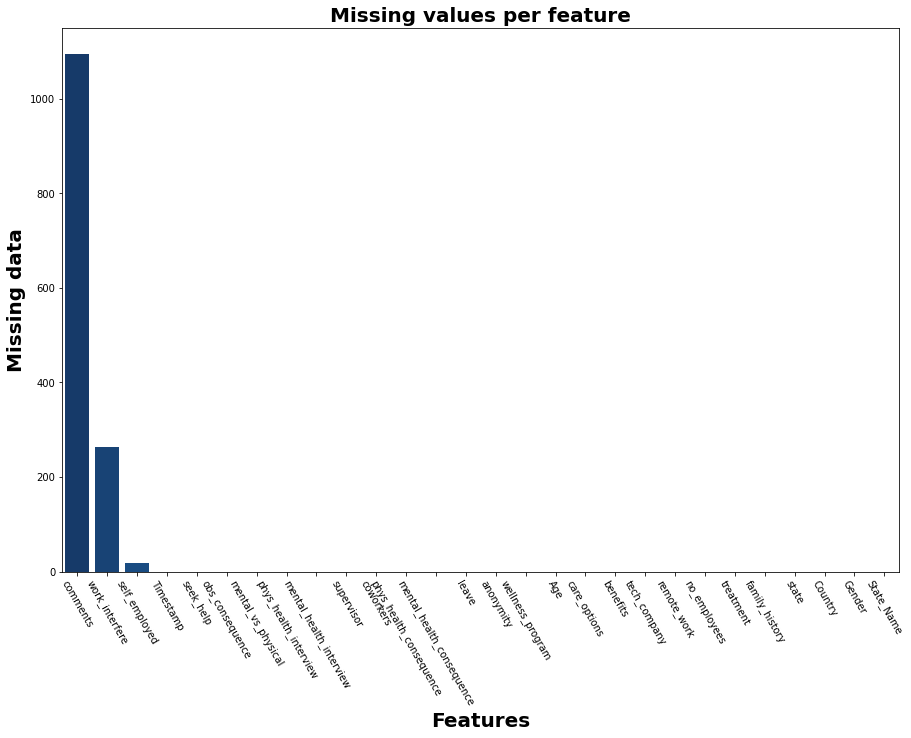

In [46]:
plt.figure(figsize=(15,10))
plt.xlabel("Features",fontweight='bold',fontsize=20.0)
plt.ylabel("Missing data",fontweight='bold',fontsize=20.0)
sns.barplot(x=features,y=missing_data,palette='Blues_r')
plt.xticks(rotation=300)
plt.title("Missing values per feature",fontweight='bold',fontsize=20.0)
plt.show()

<p style="font-family:verdana;font-size:16px"><b>🟢: Starting off with the "state" feature, it was mentioned that it is null for non-US countries. Therefore, it makes sense to fill the missing values with 'Not in US'</b></p>

In [8]:
survey_df.state = survey_df.state.fillna('Not in US')

I found the state list from this link: https://gist.github.com/rogerallen/1583593

In [9]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [10]:
survey_df['State_Name'] = survey_df.state.apply(lambda state_code: abbrev_to_us_state[state_code] if state_code not in 'Not in US' else 'Not Applicable')

In [11]:
usa_data = survey_df[survey_df.Country=='United States']
locations = usa_data.state.value_counts().keys()
state_count = usa_data.state.value_counts().values
state_name = usa_data.State_Name.value_counts().keys()

In [13]:
data = dict(type='choropleth',locations = locations,locationmode='USA-states',z=state_count,colorscale='rainbow',text = state_name) 
usa_layout = dict(title = '<b>Recorded responses from employees in USA</b>',geo=dict(scope='usa'))

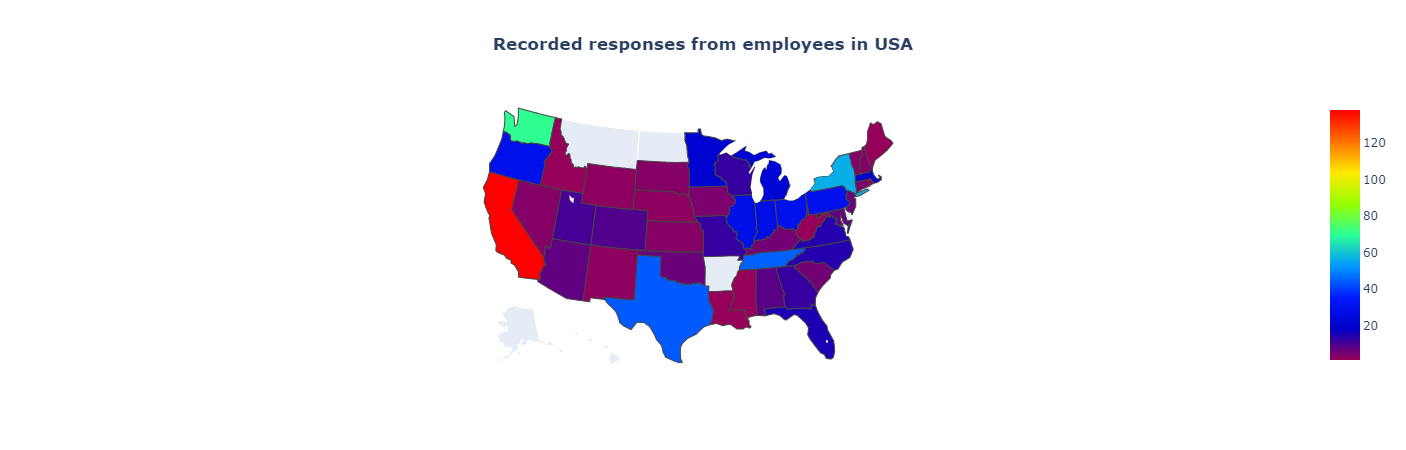

In [15]:
usa_data_fig = go.Figure(data=[data],layout=usa_layout)
usa_data_fig.update_layout(title_x=0.5)
usa_data_fig.show()

In [16]:
non_usa_data = pd.concat([survey_df,usa_data,usa_data]).drop_duplicates(keep=False)

In [17]:
locations_non_usa = non_usa_data.Country.value_counts().keys()
countries_count = non_usa_data.Country.value_counts().values

In [18]:
data_non_usa = dict(type='choropleth',locations = locations_non_usa,locationmode='country names',z=countries_count,colorscale='rainbow') 
layout_non_usa = dict(title = '<b>Recorded responses from other employees across the globe</b>',geo=dict(scope='world'),height=1000,width=1000)

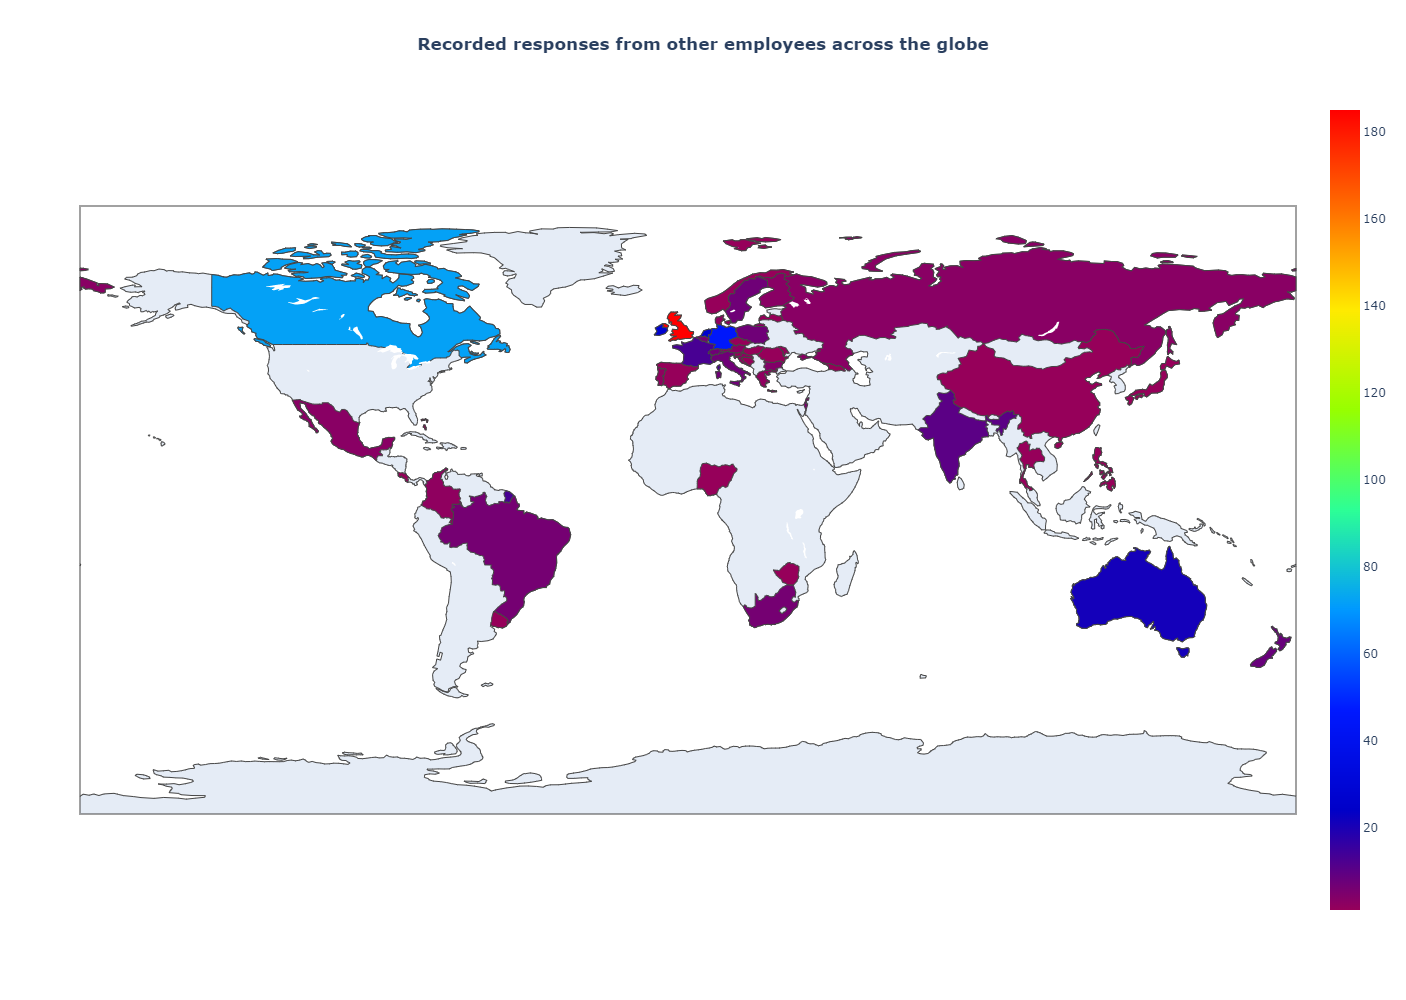

In [19]:
non_usa_data_fig = go.Figure(data=[data_non_usa],layout=layout_non_usa)
non_usa_data_fig.update_layout(title_x=0.5)
non_usa_data_fig.show()

In [ ]:
comments